# predictive Analysis on commercial success of games

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import calendar
from datetime import datetime
from pandas import Series
from math import ceil

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report,confusion_matrix

In [2]:
df = pd.read_csv('xceldata.csv', encoding="utf-8")
df

,Name,Year_of_Release,Genre,Publisher,Critic_Score,ESRB_Rating,Global_Sale
0,Monster Hunter Rise,2022.0,Card Game,Capcom,88.0,M,11.200000
1,The Anacrusis,2022.0,Shooter,Stray Bombay Company,51.0,T,0.200000
2,God of War,2022.0,Action,PlayStation PC,94.0,M,60.000128
3,Rainbow Six Extraction,2022.0,Action,Ubisoft,71.0,M,9.000000
4,Windjammers 2,2022.0,Sports,DotEmu,78.0,E,0.040688
...,...,...,...,...,...,...,...
17411,Nancy Drew: The Deadly Secret of Olde World Park,2007.0,Adventure,Majesco Entertainment,64.0,E,0.010000
17412,Fashion Designer: Style Icon,2007.0,Simulation,505 Games,NaN,NaN,0.010000
17413,Ashita no Joe 2: The Anime Super Remix,2002.0,Fighting,Capcom,NaN,NaN,0.010000
17414,NadePro!! Kisama no Seiyuu Yatte Miro!,2009.0,Adventure,GungHo,NaN,NaN,0.010000


In [3]:
df.isnull().sum()

Name                  0
Year_of_Release       8
Genre                 0
Publisher             1
Critic_Score       9054
ESRB_Rating        7138
Global_Sale           0
dtype: int64

In [4]:
df = df.dropna(axis=0)
df.isnull().sum()

Name               0
Year_of_Release    0
Genre              0
Publisher          0
Critic_Score       0
ESRB_Rating        0
Global_Sale        0
dtype: int64

## Defining hits as those with sales above 1 million units

In [5]:
dfb = df[['Name','ESRB_Rating','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sale']]
dfb = dfb.dropna().reset_index(drop=True)
df2 = dfb[['ESRB_Rating','Genre','Publisher','Year_of_Release','Critic_Score','Global_Sale']]
df2['Hit'] = df2['Global_Sale']
df2.drop('Global_Sale', axis=1, inplace=True)

In [6]:
def hit(sales):
    if sales >= 1:
        return 1
    else:
        return 0

df2['Hit'] = df2['Hit'].apply(lambda x: hit(x))

## Generating features

In [7]:
from pandas import get_dummies
df_copy = pd.get_dummies(df2)

In [8]:
df_copy[:5]

,Year_of_Release,Critic_Score,Hit,ESRB_Rating_AO,ESRB_Rating_E,ESRB_Rating_E10+,ESRB_Rating_K-A,ESRB_Rating_M,ESRB_Rating_RP,ESRB_Rating_T,...,Publisher_Yacht Club Games,Publisher_YooStar Entertainment Group Inc.,Publisher_Yukes,Publisher_Zoo Digital Publishing,Publisher_Zoo Games,Publisher_Zushi Games,Publisher_bitComposer Games,Publisher_id Software,Publisher_inXile Entertainment,Publisher_tinyBuild
0,2022.0,88.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
1,2022.0,51.0,0,0,0,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
2,2022.0,94.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,2022.0,71.0,1,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,2022.0,78.0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


## Split Data & Traning

In [9]:
df3 = df_copy
y = df3['Hit'].values
df3 = df3.drop(['Hit'],axis=1)
X = df3.values

In [10]:
Xtrain, Xtest, ytrain, ytest = train_test_split(X, y, test_size=0.33, random_state=2)

## Testing prediction accuracy with LR and RFC

In [11]:
radm = RandomForestClassifier(random_state=2).fit(Xtrain, ytrain)
y_val_1 = radm.predict_proba(Xtest)
print("Random Forest Validation accuracy: ", sum(pd.DataFrame(y_val_1).idxmax(axis=1).values
                                   == ytest)/len(ytest))

Random Forest Validation accuracy:  0.8354105571847508


In [12]:
log_reg = LogisticRegression(max_iter=3000).fit(Xtrain, ytrain)
y_val_2 = log_reg.predict_proba(Xtest)
print("Logistic Regression Validation accuracy: ", sum(pd.DataFrame(y_val_2).idxmax(axis=1).values==ytest)/len(ytest))

Logistic Regression Validation accuracy:  0.844574780058651


In [13]:
all_predictions = log_reg.predict(Xtest)
print(classification_report(ytest, all_predictions))

              precision    recall  f1-score   support

           0       0.86      0.98      0.91      2280
           1       0.59      0.17      0.27       448

    accuracy                           0.84      2728
   macro avg       0.72      0.57      0.59      2728
weighted avg       0.81      0.84      0.81      2728



Text(0.5, 1.0, 'Training Confusion Matrix')

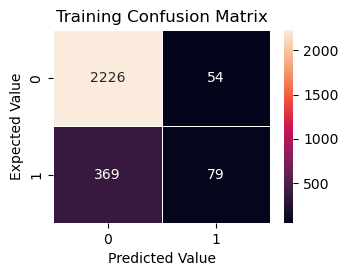

In [14]:
fig, ax = plt.subplots(figsize=(3.5,2.5))
sns.heatmap(confusion_matrix(ytest, all_predictions), annot=True, linewidths=.5, ax=ax, fmt="d").set(xlabel='Predicted Value', ylabel='Expected Value')
plt.title('Training Confusion Matrix')